### Welcome to the Blimpy Voyager Tour!

We know there should be Voyager telemetry at around 8419 MHz, let's extract it and run some tests to make sure we're doing it right,


In [1]:
%matplotlib inline

In [2]:
import blimpy as bl
import numpy as np
import pylab as plt

# For the purposes of illustration, I will assume that the Voyager files have been placed in /opt/voyager_data/.
# Here is a link to the web folder holding Voyager files: http://blpd0.ssl.berkeley.edu/Voyager_data/
VOYAGER_DIR = '/opt/voyager_data/'
voyager_fil = VOYAGER_DIR + 'Voyager1.single_coarse.fine_res.fil'
voyager_h5 = VOYAGER_DIR + 'Voyager1.single_coarse.fine_res.h5'

### Load ff from a Voyager FIL file and hf from the equivalent Voyager HDF5 file.  Perform some assertion testing and visual confirmation.

(16, 1, 39370)
(16, 1, 39370)
(39370,)
(39370,)
309333230000.0 18959
309333230000.0 18959
274257400000.0 18996
274257400000.0 18996
extracting integration 0...
extracting integration 0...


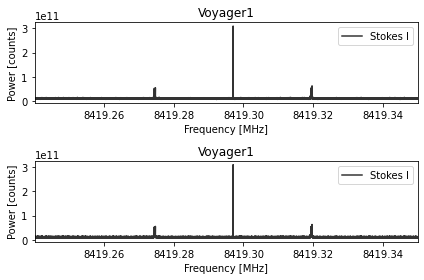

In [11]:
ff = bl.Waterfall(voyager_fil, f_start=8419.24, f_stop=8419.35)
hf = bl.Waterfall(voyager_h5, f_start=8419.24, f_stop=8419.35)

print(ff.data.shape)
print(hf.data.shape)
print(ff.container.populate_freqs().shape)
print(hf.container.populate_freqs().shape)
print(ff.data[0].max(), ff.data[0].argmax())
print(hf.data[0].max(), hf.data[0].argmax())
print(ff.data[-1].max(), ff.data[-1].argmax())
print(hf.data[-1].max(), hf.data[-1].argmax())

# Assert data is loaded to the same shape and has same values
assert ff.data.shape == hf.data.shape == (16, 1, 39370)
assert np.allclose(ff.data, hf.data)

# Check the Voyager carrier has the known amplitudes at first and last integration
assert np.allclose(ff.data[0].max(), hf.data[0].max(), 3.09333e+11)
assert np.allclose(ff.data[-1].max(), hf.data[-1].max(), 2.74257e+11)

# Check the tone is in the same bin for both
assert ff.data[0].argmax()  == hf.data[0].argmax() == 18959
assert ff.data[-1].argmax() == hf.data[-1].argmax() == 18996

plt.subplot(2,1,1)
ff.plot_spectrum()

plt.subplot(2,1,2)
hf.plot_spectrum()
plt.tight_layout()

### Find the maximum and minimum values.  Perform some assertion testing and visual confirmation.

(16, 1, 39370)
(16, 1, 39370)
309333230000.0 18959
309333230000.0 18959
274257400000.0 18996
274257400000.0 18996
extracting integration 0...
extracting integration 0...


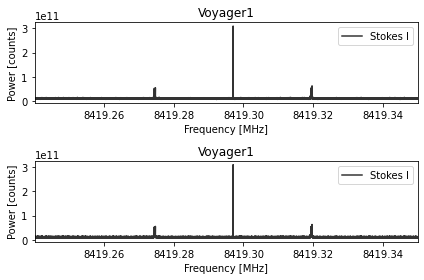

In [12]:
fw = bl.Waterfall(voyager_fil, f_start=8419.24, f_stop=8419.35)
hw = bl.Waterfall(voyager_h5, f_start=8419.24, f_stop=8419.35)

print(fw.data.shape)
print(hw.data.shape)
print(hw.data[0].max(), hw.data[0].argmax())
print(fw.data[0].max(), fw.data[0].argmax())
print(hw.data[-1].max(), hw.data[-1].argmax())
print(fw.data[-1].max(), fw.data[-1].argmax())
# Assert data is loaded to the same shape and has same values
assert hw.data.shape == fw.data.shape == (16, 1, 39370)
assert np.allclose(hw.data, fw.data)

# Check the Voyager carrier has the known amplitudes at first and last integration
assert np.allclose(hw.data[0].max(), fw.data[0].max(), 3.09333e+11)
assert np.allclose(hw.data[-1].max(), fw.data[-1].max(), 2.74257e+11)

# Check the tone is in the same bin for both
assert hw.data[0].argmax() == fw.data[0].argmax() == 18959
assert hw.data[-1].argmax() == fw.data[-1].argmax() == 18996

# And plot
plt.subplot(2,1,1)
fw.plot_spectrum()

plt.subplot(2,1,2)
hw.plot_spectrum()
plt.tight_layout()

### Sanity check: all spectra are the same?

extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...


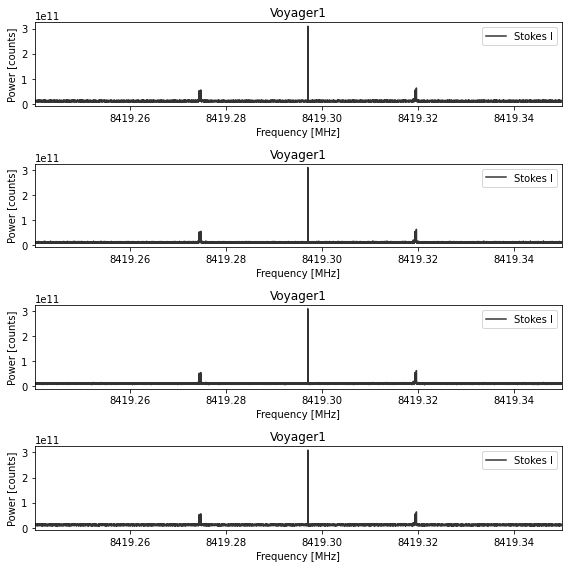

In [13]:
all_readers = [ff, hf, ff, hf]

plt.figure(figsize=(8, 8))
for ii, rr in enumerate(all_readers):
    plt.subplot(4, 1, ii+1)
    rr.plot_spectrum()
plt.tight_layout()

### Re-load full files and _then_ plot extracted portions and perform more tests.

In [18]:
ff = bl.Waterfall(voyager_fil)
hf = bl.Waterfall(voyager_h5)

extracting integration 0...
extracting integration 0...
extracting integration 0...
extracting integration 0...


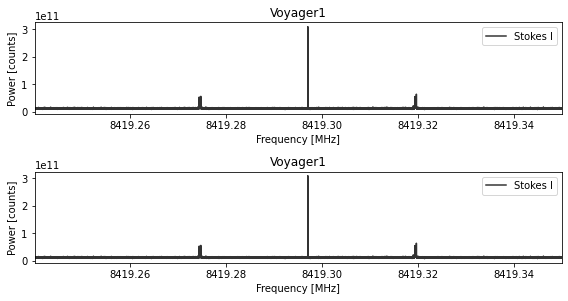

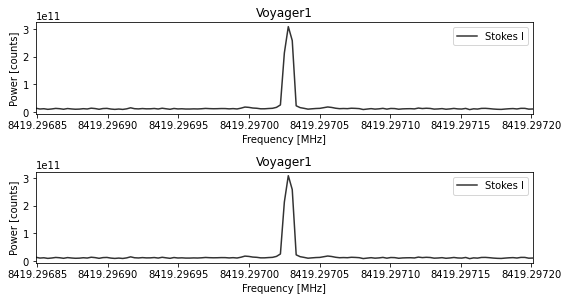

In [19]:
all_readers = [ff, hf]

plt.figure(figsize=(8, 8))
for ii, rr in enumerate(all_readers):
    plt.subplot(4, 1, ii+1)
    rr.plot_spectrum(f_start=8419.24, f_stop=8419.35)
plt.tight_layout()

plt.figure(figsize=(8, 8))
for ii, rr in enumerate(all_readers):
    plt.subplot(4, 1, ii+1)
    rr.plot_spectrum(f_start=8419.29685, f_stop=8419.2972)
plt.tight_layout()

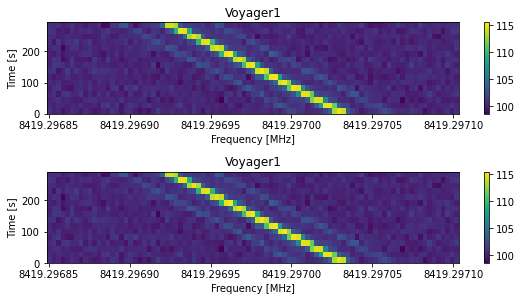

In [20]:
plt.figure(figsize=(8, 8))
for ii, rr in enumerate(all_readers):
    plt.subplot(4, 1, ii+1)
    rr.plot_waterfall(f_start=8419.29685, f_stop=8419.2971)
plt.tight_layout()

In [21]:
for ii, rr in enumerate(all_readers):
    f, d = rr.grab_data(f_start=8419.29, f_stop=8419.30)
    print(f.shape, d.shape)
    assert f.shape == (3580,)
    assert d.shape == (16, 3580)

for ii, rr in enumerate(all_readers):
    f, d = rr.grab_data(f_start=8419.29685, f_stop=8419.2971)
    print(f.shape, d.shape)
    assert f.shape == (91,)
    assert d.shape == (16, 91)

(3580,) (16, 3580)
(3580,) (16, 3580)
(91,) (16, 91)
(91,) (16, 91)
